# Introduction to neural networks


In this session we will start with a simple toy implementation of a neural network and apply it to the XOR problem. In the second part we will learn how to use the [Pytorch toolkit](https://pytorch.org/) to define, train and use a practical neural network model.

## XOR

Let's start with the [XOR problem](https://en.wikipedia.org/wiki/XOR_gate). 

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot

### Exercise 7.1
Define the function `xor`, which which takes a Nx2 array, where each row is an input to the logical XOR. It outputs an array of size N with the corresponding outputs.

Given `X = numpy.array([[0, 0],      
                 [0, 1],      
                 [1, 0],      
                 [1, 1]])`
                 
`xor(X)` should output `[0, 1, 1, 0]`

In [2]:
def xor(X):
    #.........
    return (X.sum(axis=1) == 1).astype(int)

In [3]:
X = numpy.array([[0, 0],      # FALSE
                 [0, 1],      # TRUE
                 [1, 0],      # TRUE
                 [1, 1]])     # FALSE
y = xor(X)
print(y)

[0 1 1 0]


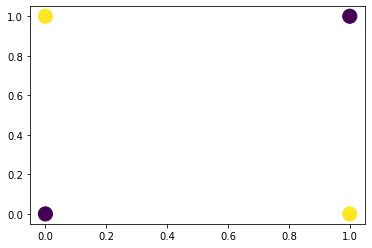

In [5]:
pyplot.scatter(X[:,0], X[:,1], c=y, s=200)

## Neural network
We can define a simple two layer neural network by hand which solves the XOR classification problem. The network has parameters $\mathbf{W}$ and $\mathbf{U}$, and computes the following:

$$Y = \sigma(U(\sigma(WX^T))$$

Where $\mathbf{X}$ is the input array, with shape Nx2, $\mathbf{W}$ is a 2x2 matrix, and $\mathbf{U}$ is a 1x2 matrix. The result is a 1xN matrix (i.e. a single row vector) of XOR values.

### Exercise 2

Define function `sigma` which returns one if the input is greater than or equal to 0.5, and zero otherwise.

Given `X = numpy.array([[0.1, 0.3], [0.5, 0.7]])`
        
`sigma(X)` should output 

`[[0. 0.]
[1. 1.]]`

In [6]:
def sigma(X):
    #...............
    return (X >= 0.5).astype(float)

In [7]:
z = numpy.random.uniform(0,1,(3,2))
print(z)
print(sigma(z))
print(sigma(numpy.array([[0.1, 0.3],
            [0.5, 0.7]])))

[[0.75361463 0.95510798]
 [0.86941517 0.4427421 ]
 [0.66778798 0.20810856]]
[[1. 1.]
 [1. 0.]
 [1. 0.]]
[[0. 0.]
 [1. 1.]]


### Exercise 3

Define function `nnet` which takes the weight matrices W and U, and the input X, and returns the result Y computed according to the formula above.

Given 

<pre>
X = numpy.array([[0, 0],      
                 [0, 1],      
                 [1, 0],      
                 [1, 1]])
 
W = numpy.array([[1,-1],
                 [-1,1]])
                 
U = numpy.array([1,1])
</pre>

`nnet(W, U, X)` should output `[0, 1, 1, 0]`

In [8]:
def nnet(W,U,X):
    #..........................................
    Z = sigma(numpy.dot(W,numpy.transpose(X)))
    return sigma(numpy.dot(U,Z))

Define the weights:

In [9]:
W = numpy.array([[1,-1],
                 [-1,1]])
U = numpy.array([1,1])

Check what it outputs

In [10]:
y_pred = nnet(W, U, X)
print(y)
print(y_pred)


[0 1 1 0]
[0. 1. 1. 0.]


And plot the outputs as a function of inputs.

([], [])

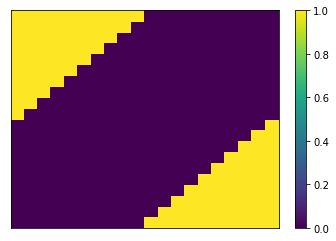

In [12]:
# Create a grid of points for plotting
shape=(20,20)
grid = numpy.array([ [i,j] for i in numpy.linspace(0,1,shape[0]) 
                               for j in numpy.linspace(0,1,shape[1]) ])
# Apply the neural net to all the points
y_pred = nnet(W, U, grid)
pyplot.pcolor(y_pred.reshape((20,20)))
pyplot.colorbar()
pyplot.xticks([])
pyplot.yticks([])

## Training XOR NN with TensorFlow

We'll now learn how to build a simple neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
# Add two hidden layers with 4 hidden units each, and the tanh activation.

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='tanh'))

# The final layer is the output layer with an inverse logit activation function.
model.add(Dense(1, activation='sigmoid'))

# Use the Adam optimizer. Adam works similar to regular SGD, 
# but with some important improvements: https://arxiv.org/abs/1412.6980
optimizer = Adam(learning_rate=0.02)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

We can now train the model, specifying number of epochs, size of the minibatch, and whether to print extra information.

In [ ]:
model.fit(X, y, epochs=100, batch_size=1, verbose=1)

In [46]:
print("   x1          x2          F(x1, x2)")
print(np.hstack([X, model.predict(X)]))

   x1          x2          F(x1, x2)
[[0.         0.         0.01677552]
 [0.         1.         0.96772838]
 [1.         0.         0.98788673]
 [1.         1.         0.03300327]]


([], [])

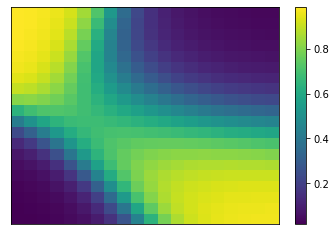

In [47]:
# Apply the neural net to all the points
y_pred = model.predict(grid)
pylab.pcolor(y_pred.reshape((20,20)))
pylab.colorbar()
pylab.xticks([])
pylab.yticks([])

## Regression with NN on iris

We will now define and train a neural network model for regression on the iris data.

### Load data

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data = load_iris()
# Inputs
X = numpy.array(data.data[:,0:3], dtype='float32')
# Output
y = numpy.array(data.data[:,3], dtype='float32')


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=999)
print(X_train.shape)
print(y_train.shape)

(100, 3)
(100,)


### Exercise 7.4


Define a multilayer perceptron with the following specifications:
- Hidden layer 1: size 16, activation: tanh
- Hidden layer 2: size 16, activation: tanh
- Output layer: size 1, activation: linear

Compile it using the following specifications:
- optimizer: Adam
- loss: mean squared error

Train the network, and try to find a good value of learning rate by monitoring the loss.

Compute mean absolute error and r-squared the validation data.

In [ ]:
#..................................

model = Sequential()
model.add(Dense(16, input_dim=3, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='linear'))

optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

In [50]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_val)
print(mean_absolute_error(y_val, y_pred))
print(r2_score(y_val, y_pred))

0.21771862
0.8673765913370082


## Classification

Let's now do classification. The target is a categorical vector. It will need to be transformed to an array of dummies. This transform is also called one-hot encoding.
This can be done manually, but sklearn.preprocessing has some utilities that make it simple:
- OneHotEncoder
- LabelBinarizer


In [51]:
# Inputs
X = numpy.array(data.data, dtype='float32')
# Output
y = numpy.array(data.target, dtype='int32')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=999)

# One-hot Indicator array for classes
from sklearn.preprocessing import LabelBinarizer
onehot = LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.transform(y_val)

print(Y_train[:10,:])

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]


### Exercise 7.5

Define a multilayer perceptron with the following specifications:
- Hidden layer 1: size 16, activation: tanh
- Hidden layer 2: size 16, activation: tanh
- Output layer: size 3, activation: softmax

NB: softmax is a generalization of inverse logit to more than 2 classes. It converts class scores to class probabilities, while making sure than they sum up to 1:

```
def softmax(x):
    z = numpy.exp(x)
    return z/numpy.sum(z)
```

Compile it using the following specifications:
- optimizer: Adam
- loss: categorical_crossentropy

Train the network, and try to find a good value of learning rate by monitoring the loss.
Use the method `.predict_classes` to predict the targets on validation data.
Compute the classification accuracy on validation data.

In [ ]:
#.....................................
model = Sequential()
model.add(Dense(16, input_dim=4, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax')) # We need to have as many units as classes, 
                                                             # and softmax activation
optimizer = Adam(lr=0.001)
# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.fit(X_train, Y_train, epochs=10, batch_size=1, verbose=2)

In [53]:
#.....................................
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_val, verbose=False)
print(accuracy_score(y_val, y_pred))

0.98


### Exercise 7.6


Train a neural network classifier on the handwritten digits dataset. 
This dataset comes with scikit learn and can be accessed as follows:

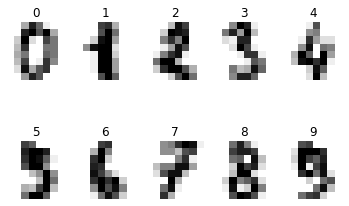

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    pylab.subplot(2, 5, index + 1)
    pylab.axis('off')
    pylab.imshow(image,cmap=plt.cm.gray_r)
    pylab.title('%i' % label)

The targets are in `digits.target` and the pixel values flattened into an array are in `digits.data`.

Train a classifier on the first 1000 of the images, and evaluate on the rest. 
Before testing the neural network model, check the classification error rate of a logistic regression classifier as a baseline.


Remember to convert the targets to the one-hot representation for training the neural network.

Some things to try when training a neural network model for this dataset:

- start with two or three hidden layers
- use between 32 to 128 units in each layer
- try different learning rates in the Adam optimizer (lr=0.001, lr=0.0001) and monitor the loss function
- train for at least 100 epochs
- try the `relu` activation function instead of `tanh`



In [54]:
# .....................
X_train = digits.data[:1000,:]
y_train = digits.target[:1000]
X_val = digits.data[1000:,:]
y_val = digits.target[1000:]

onehot = LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.transform(y_val)

from sklearn.linear_model import LogisticRegression
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
print(1-accuracy_score(y_val, baseline.predict(X_val)))

0.07277289836888334


/Library/Python/3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#.....................................
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, 
                                                             # and softmax activation
optimizer = Adam(lr=0.0001)
# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=1)

In [32]:
y_pred = model.predict_classes(X_val, verbose=0)
print(1-accuracy_score(y_val, y_pred))

0.07026348808030114
